In [1]:
import time
import numpy as np
from numpy import newaxis
from matplotlib import pyplot as plt
import pickle
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [47]:
data_list=['Barclays-Noida-3.2-Jan', 'Barclays-Noida-3.2-Feb', 'Barclays-Noida-3.2-March','Barclays-Noida-3.2-April']

for month in range(len(data_list)):
    month_data=pickle.load(open('../../processed_data/'+data_list[month]+'.p', "rb" ))
    if month==0:
         data=month_data.copy()
    else:
        data=pd.concat([data,month_data])
data=data.drop(['Country','Department','Resource Type'],axis=1)

data=data.groupby([data.floor,data.seatName,pd.Grouper(key='Datetime',freq='H')])
data=data['Space'].agg([np.sum])
data.reset_index(inplace=True)
data['isOccupied']=[0 if x <3 else 1 for x in data['sum']]
data=data.drop(['sum'],axis=1)
floor_data=data.groupby([data.floor,pd.Grouper(key='Datetime',freq='H')])['isOccupied'].agg([np.sum])
floor_data.reset_index(inplace=True)
one_floor=floor_data.loc[floor_data.floor=='Level 9']
one_floor=one_floor.drop(['floor'],axis=1)
one_floor.set_index('Datetime',inplace=True)
one_floor.index.freq='H'
#data=np.array(one_floor['sum'])

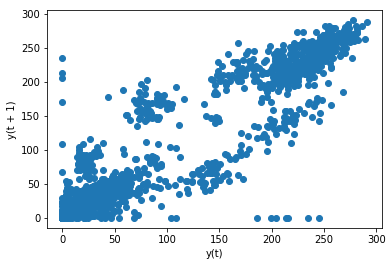

In [3]:
from pandas.plotting import lag_plot
lag_plot(one_floor)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014680346F98>]],
      dtype=object)

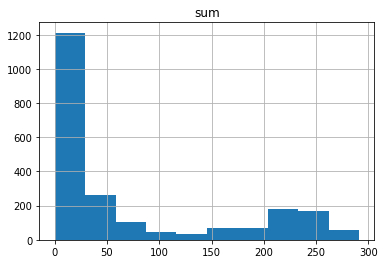

In [4]:
one_floor.hist()

In [5]:

def dec_plot(data):
    from statsmodels.tsa.seasonal import seasonal_decompose
    result=seasonal_decompose(data,model='additive')
    result.plot()
    plt.show();

def corr_plot(data):
    from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
    acf=plot_acf(data,lags=25,zero=False)
    plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
    pacf=plot_pacf(data,lags=25,zero=False)
    plt.show()
    
def adf_test(data):
    from statsmodels.tsa.stattools import adfuller
    result=adfuller(data['sum'])
    df_res=pd.Series(result[0:4],index=['ADF Test Statistic','p-value','#lags used','# of observations'])
    for key,value in result[4].items():
        df_res['Critical value (%s)'%key]=value
    print(df_res)

In [6]:
adf_test(one_floor)

ADF Test Statistic     -6.691782e+00
p-value                 4.092278e-09
#lags used              2.700000e+01
# of observations       2.180000e+03
Critical value (1%)    -3.433353e+00
Critical value (5%)    -2.862867e+00
Critical value (10%)   -2.567476e+00
dtype: float64


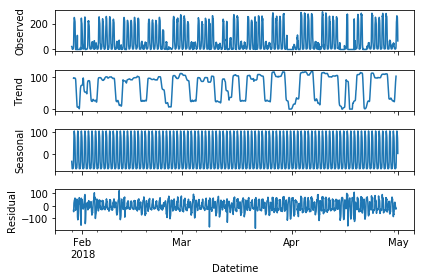

In [7]:
dec_plot(one_floor)

In [8]:
one_floor

,sum
Datetime,
2018-01-29 00:00:00,23
2018-01-29 01:00:00,21
2018-01-29 02:00:00,14
2018-01-29 03:00:00,3
2018-01-29 04:00:00,3
2018-01-29 05:00:00,5
2018-01-29 06:00:00,3
2018-01-29 07:00:00,3
2018-01-29 08:00:00,3


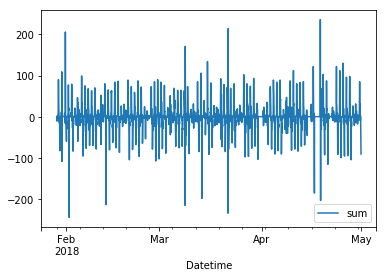

In [15]:
seas_diff=one_floor.diff(1)
seas_diff.dropna(inplace=True)
seas_diff.plot()

In [14]:
adf_test(seas_diff)

ADF Test Statistic       -2.6606099751
p-value                   0.0811059794
#lags used               14.0000000000
# of observations       153.0000000000
Critical value (1%)      -3.4738297757
Critical value (5%)      -2.8806228997
Critical value (10%)     -2.5769448985
dtype: float64


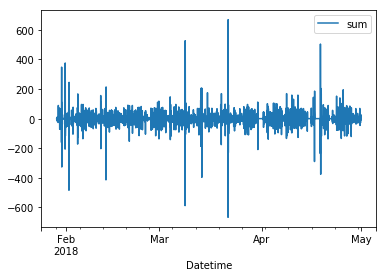

In [19]:
first_diff=seas_diff.diff(1)
first_diff.dropna(inplace=True)
first_diff.plot()

In [20]:
adf_test(first_diff)

ADF Test Statistic       -26.908388
p-value                    0.000000
#lags used                27.000000
# of observations       2177.000000
Critical value (1%)       -3.433357
Critical value (5%)       -2.862869
Critical value (10%)      -2.567477
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014682037828>]],
      dtype=object)

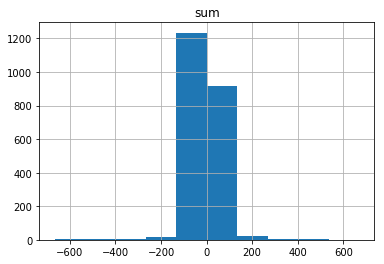

In [25]:
first_diff.hist()

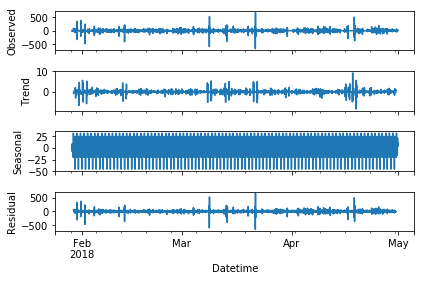

In [26]:
dec_plot(first_diff)

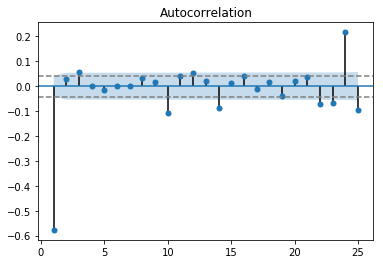

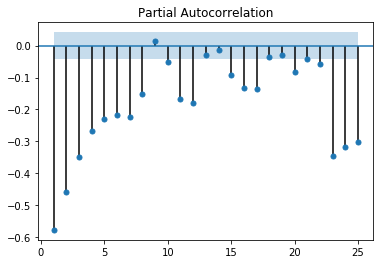

In [27]:
corr_plot(first_diff)

In [49]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,explained_variance_score
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.statespace.sarimax import SARIMAX

def acc_score(data,show_res):
    n_data= data[data['Forecast'].notnull()]

    y_true=n_data['sum']
    y_pred=n_data['Forecast']
    RMSE=rmse(y_true,y_pred)
    MAE=mean_absolute_error(y_true,y_pred)
    R2=r2_score(y_true,y_pred)
    MAPE=np.mean(np.abs((y_true-y_pred)/y_true))*100
    
    if show_res==True:
        print(' ERROR MEASURES ')
        print('Root Mean Squared Error: ', RMSE)
        print('Mean Absolute Error: ', MAE)
        print('Mean Absolute Percent Error: ', MAPE)
        print('R2 score: ', R2)
    
    return RMSE,MAE,R2,MAPE

def build_model(data,train_data,param,seasonal_param,show_res):
    data_forecast=data.copy()
   
    model=SARIMAX(train_data,order=param,seasonal_order=seasonal_param)
    model_fit=model.fit()
    
    df=model_fit.forecast(steps=24)
   # print(df)
    #print(len(data_forecast),len(df))
    data_forecast['Forecast']=df
    if show_res==True:
        print(model_fit.summary())
        
    return data_forecast,model_fit.aic



def grid_search(data,train_data):
    import itertools
    import warnings
    warnings.filterwarnings("ignore")
    
    p=d=q = range(0,3)
    
    pdq=list(itertools.product(p,d,q))
    PDQ=[(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    
    arima_model=list()
    for param in pdq:
        for seasonal_param in PDQ:
            try:

                data_forecast,model_aic=build_model(data,train_data,param,seasonal_param,False)
                RMSE,MAE,R2,MAPE=acc_score(data_forecast,False)
                arima_model.append([param,seasonal_param,model_aic,RMSE,MAE,MAPE,R2])  
                
            except:
                continue
    columns=['pdq','PDQ','AIC','RMSE','MAE','MAPE','R2']
    grid_res=pd.DataFrame(arima_model,columns=columns)
    grid_res=grid_res.sort_values(by=['RMSE','MAE','MAPE'],ascending=True)
    print(len(arima_model),(len(grid_res)))

    return grid_res



from sklearn.model_selection import TimeSeriesSplit

def grid_searchCV(orig_data):
    import itertools
    import warnings
    warnings.filterwarnings("ignore")
    
    p=d=q = range(0,3)
    
    pdq=list(itertools.product(p,d,q))
    PDQ=[(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]
    
    arima_model=list()
    for param in pdq:
        for seasonal_param in PDQ:
            try:
                data=orig_data.reset_index()
                ini_train_data=data.loc[data['Datetime']<'2018-04-16']
                data_to_split=data.loc[data['Datetime']>='2018-04-16']
                tss=TimeSeriesSplit(n_splits=2)
                
                result_list=list()
                for train_index,test_index in tss.split(data_to_split):

                    X_train, X_test = data_to_split.iloc[train_index], data_to_split.iloc[test_index]
                    X_train=pd.concat([ini_train_data,X_train])
                    X_train.set_index('Datetime',inplace=True)
                    data_forecast,model_aic=build_model(orig_data,X_train,param,seasonal_param,False)
                    RMSE,MAE,R2,MAPE=acc_score(data_forecast,False)
                    result_list.append([model_aic,RMSE,MAE,MAPE,R2])
                    
                model_avg_result=np.mean(result_list,0)
                
                arima_model.append([param,seasonal_param,model_avg_result[0],
                                    model_avg_result[1],model_avg_result[2],model_avg_result[3],model_avg_result[4]])  
                
            except:
                continue
    columns=['pdq','PDQ','AIC','RMSE','MAE','MAPE','R2']
    grid_res=pd.DataFrame(arima_model,columns=columns)
    grid_res=grid_res.sort_values(by=['RMSE','MAE','MAPE'],ascending=True)
    print(len(arima_model),(len(grid_res)))

    return grid_res

### NORMAL GRID SEARCH VS. GRIDSEARCH CV

In [ ]:
gridCV_res=grid_searchCV(one_floor)
display(gridCV_res)

In [ ]:
train_data=data.loc[data.index<'2017-01-01']
grid_res=grid_search(data,train_data)
display(grid_res)

180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4
180 4


2017-09-01    2.6844501176e+06
2017-10-01    2.9310185727e+06
2017-11-01    2.9799539639e+06
2017-12-01    7.1317129974e+06
Freq: MS, dtype: float64
180 4
 ERROR MEASURES 
Root Mean Squared Error:  709570.4007475069
Mean Absolute Error:  430177.90125867655
Mean Absolute Percent Error:  5.897195147258973
R2 score:  0.923368281623903


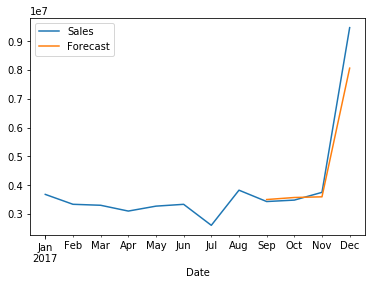

In [24]:
train_data=data.loc[data.index<'2017-09-01']
sresult,aic=build_model(data,train_data,(0,0,0),(2,1,1,12),False)
simple_test_data=result.loc[result.index>='2017-01-01']
acc_score(simple_test_data,True)
simple_test_data.plot()

180 4
 ERROR MEASURES 
Root Mean Squared Error:  709570.4007475069
Mean Absolute Error:  430177.90125867655
Mean Absolute Percent Error:  5.897195147258973
R2 score:  0.923368281623903


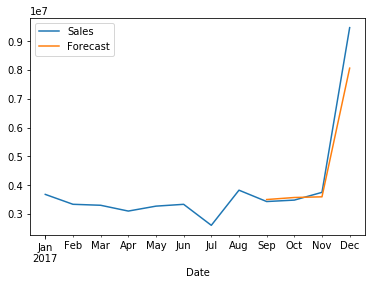

In [22]:
train_data=data.loc[data.index<'2017-09-01']
result,aic=build_model(data,train_data,(2,1,0),(2,2,1,12),False)
cv_test_data=result.loc[result.index>='2017-01-01']
acc_score(cv_test_data,True)
cv_test_data.plot()

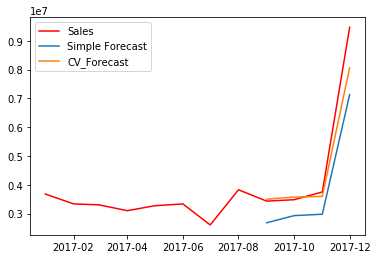

In [81]:
plt.plot(test_data['Sales'],label='Sales',c='red')
plt.plot(simple_test_data['Forecast'],label='Simple Forecast')
plt.plot(cv_test_data['Forecast'],label='CV_Forecast')
plt.legend()
plt.show()

#### There is a notable increase in accuracy when using crossvalidation in our grid search instead of just grid search. The cross validation makes sure our model gives consistent results.

In [82]:
print('Final Forecast')
model=SARIMAX(data,order=(2,1,0),seasonal_order=(2,2,1,12))
model_fit=model.fit()
print(model_fit.summary())

Final Forecast
                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                  180
Model:             SARIMAX(2, 1, 0)x(2, 2, 1, 12)   Log Likelihood               -2270.411
Date:                            Fri, 30 Mar 2018   AIC                           4552.821
Time:                                    18:26:24   BIC                           4571.979
Sample:                                01-01-2003   HQIC                          4560.589
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4099      0.229     -1.787      0.074      -0.860       0.040
ar.L2         -0.190

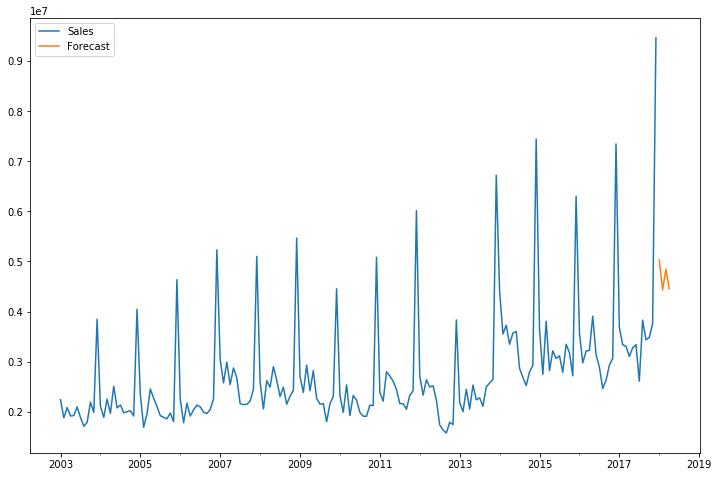

2018-01-01    5.0315484368e+06
2018-02-01    4.4303722022e+06
2018-03-01    4.8449420452e+06
2018-04-01    4.4537928879e+06
Freq: MS, Name: Forecast, dtype: float64


In [84]:
forecast_results=model_fit.forecast(steps=4)
forecast_results.rename('Forecast',inplace=True)
forecast_data=pd.concat((data,forecast_results),axis=1)
forecast_data.plot(figsize=(12,8))
plt.show()
print(forecast_results)

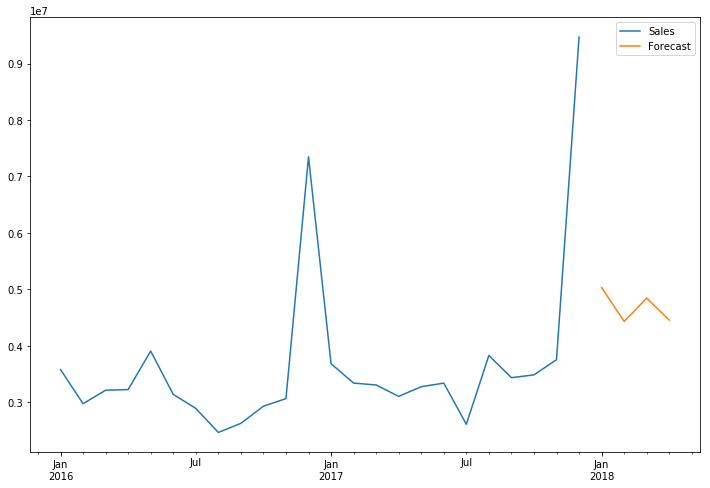

In [85]:
test_data=forecast_data.loc[forecast_data.index>='2016-01-01']
test_data.plot(figsize=(12,8))
plt.show()

In [86]:
writer=pd.ExcelWriter('2018_Q1_forecast.xlsx')
forecast_data.to_excel(writer,'2018_Q1_forecast')
writer.save()